In [30]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [31]:
# define the X and y
X = data.drop(["y"], axis=1)
y = data.loc[:, "y"]

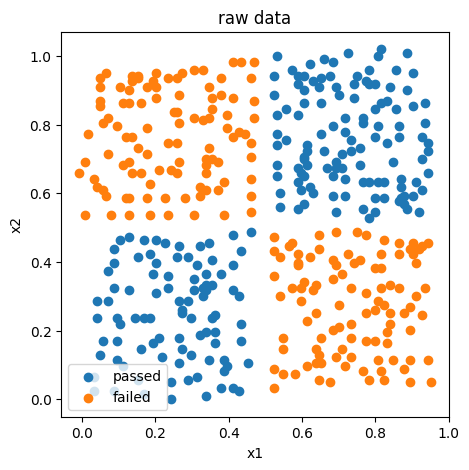

In [32]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
passed=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [33]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10
)
print(X_train.shape, X_test.shape, X.shape)

(275, 2) (136, 2) (411, 2)


In [ ]:
# set up the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=20, input_dim=2, activation="sigmoid"))
mlp.add(Dense(units=1, activation="sigmoid"))
mlp.summary()

c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
mlp.fit(X_train, y_train, epochs=3000)

Epoch 1/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.7170
Epoch 2/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.7055
Epoch 3/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.6944
Epoch 4/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.6993
Epoch 5/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.6969
Epoch 6/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.6945
Epoch 7/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.6944
Epoch 8/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.6936
Epoch 9/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.6937
Epoch 10/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.6937
Epoch 11/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.6934
Epoch 12/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.6934
Epoch 13/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.6936
Epoch 14/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.6942
Epoch 15/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - lo

In [37]:
# predict the training data and calcualte the accuracy
from sklearn.metrics import accuracy_score

# y_train_predict = mlp.predict_classes(X_train)
# predict_classes was removed in TensorFlow 2.6
# https://discuss.ai.google.dev/t/sequential-object-has-no-attribute-predict-classes/19265/5
# Binary Classification: predictions = (model.predict(x_test) > 0.5).astype("int32")
y_train_predict = (mlp.predict(X_train) > 0.5).astype("int32")
print(accuracy_score(y_train, y_train_predict))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
0.9927272727272727


In [38]:
# predict the test data and calcualte the accuracy
y_test_predict = (mlp.predict(X_test) > 0.5).astype("int32")

print(accuracy_score(y_test, y_test_predict))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1.0


In [39]:
print(y_train_predict[0:10])


[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [40]:
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)

print(y_train_predict_form)

0      1
1      0
2      0
3      0
4      1
      ..
270    0
271    0
272    1
273    1
274    0
Length: 275, dtype: int32


In [41]:
# generate new data for plot
xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
x_range = np.c_[xx.ravel(), yy.ravel()]
# y_range_predict = mlp.predict_classes(x_range)
y_range_predict = (mlp.predict(x_range) > 0.5).astype("int32")
print(type(y_range_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
<class 'numpy.ndarray'>


In [42]:
# format the output
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)

print(y_range_predict_form)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32


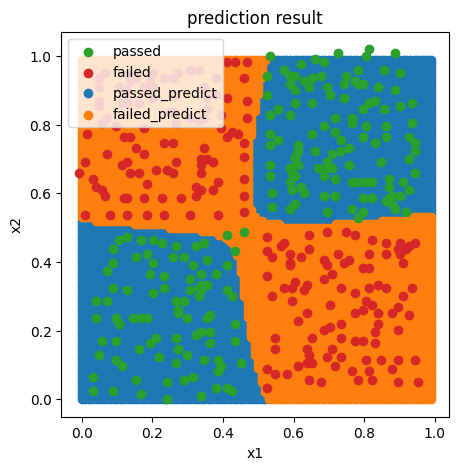

In [43]:
fig2 = plt.figure(figsize=(5, 5))
passed_predict = plt.scatter(
    x_range[:, 0][y_range_predict_form == 1], x_range[:, 1][y_range_predict_form == 1]
)
failed_predict = plt.scatter(
    x_range[:, 0][y_range_predict_form == 0], x_range[:, 1][y_range_predict_form == 0]
)

passed = plt.scatter(X.loc[:, "x1"][y == 1], X.loc[:, "x2"][y == 1])
failed = plt.scatter(X.loc[:, "x1"][y == 0], X.loc[:, "x2"][y == 0])
plt.legend(
    (passed, failed, passed_predict, failed_predict),
    ("passed", "failed", "passed_predict", "failed_predict"),
)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("prediction result")
plt.show()